In [17]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


In [18]:
import numpy as np
import tensorflow as tf
import time

size= (1000, 1000)
A = np.random.rand(*size)
B = np.random.rand(*size)

start= time.time()
C_numpy = np.dot(A,B)
print("NumPy Time:", time.time() - start)

A_tf = tf.constant(A)
B_tf = tf.constant(B)
start= time.time()
C_tf = tf.matmul(A_tf, B_tf)
print("TensorFlow Time:", time.time() - start)

NumPy Time: 0.0769047737121582
TensorFlow Time: 0.15388870239257812


In [19]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow

In [20]:
from tensorflow.keras.utils import to_categorical

Task 1: Data Preparation

In [21]:
train_dir = "/content/drive/MyDrive/AI & ML/DevanagariHandwrittenDigitDataset/Train/"
test_dir = "/content/drive/MyDrive/AI & ML/DevanagariHandwrittenDigitDataset/Test/"
# Define image size
img_height, img_width = 28, 28
# Function to load images and labels using PIL
def load_images_from_folder(folder):
  images = []
  labels = []
  class_names = sorted(os.listdir(folder)) # Sorted class names (digit_0, digit_1, ...)
  class_map = {name: i for i, name in enumerate(class_names)} # Map class names to labels
  for class_name in class_names:
    class_path = os.path.join(folder, class_name)
    label = class_map[class_name]
    for filename in os.listdir(class_path):
      img_path = os.path.join(class_path, filename)
      # Load image using PIL
      img = Image.open(img_path).convert("L") # Convert to grayscale
      img = img.resize((img_width, img_height)) # Resize to (28,28)
      img = np.array(img) / 255.0 # Normalize pixel values to [0,1]
      images.append(img)
      labels.append(label)
  return np.array(images), np.array(labels)

In [22]:
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

Task 2: Build the FCN Model

Training set: (280, 28, 28, 1), Labels: (280, 10)
Testing set: (3020, 28, 28, 1), Labels: (3020, 10)


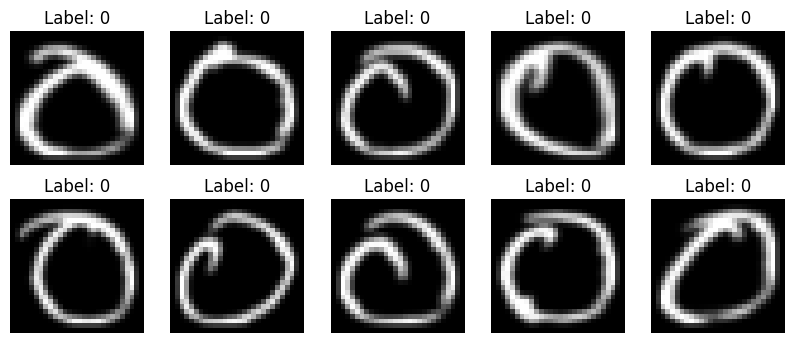

In [23]:
# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1) # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")
# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
  plt.title(f"Label: {np.argmax(y_train[i])}")
  plt.axis("off")
plt.show()

Task 3: Compile the Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])


Task 4: Train the Model

In [29]:
batch_size = 128
epochs = 20

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 417ms/step - accuracy: 0.0000e+00 - loss: 2.4716 - val_accuracy: 1.0000 - val_loss: 1.6004
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 1.0000 - loss: 1.4747 - val_accuracy: 1.0000 - val_loss: 0.8057
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.7252 - val_accuracy: 1.0000 - val_loss: 0.3392
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 1.0000 - loss: 0.3014 - val_accuracy: 1.0000 - val_loss: 0.1350
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 1.0000 - loss: 0.1201 - val_accuracy: 1.0000 - val_loss: 0.0572
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 0.0512 - val_accuracy: 1.0000 - val_loss: 0.0270
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.0244 - val_accuracy: 1.0000 - val_loss: 0.0143
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 1.0000 - loss: 0.0130 - val_accuracy: 1.0000 - val_loss: 

Task 5: Evaluate the Model

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

95/95 - 0s - 5ms/step - accuracy: 0.0993 - loss: 8.6656
Test accuracy: 0.0993


Task 6: Save and Load the Model

In [31]:
model.save('devnagari_fcn.h5')

loaded_model = tf.keras.models.load_model('devnagari_fcn.h5')
loaded_model.evaluate(x_test, y_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3201 - loss: 6.6183


[8.66559886932373, 0.09933774918317795]

Task 7: Predictions

In [32]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

#displaying first 10 predictions
for i in range(10):
    print(f"Predicted: {predicted_labels[i]}, Actual: {np.argmax(y_test[i])}")


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0


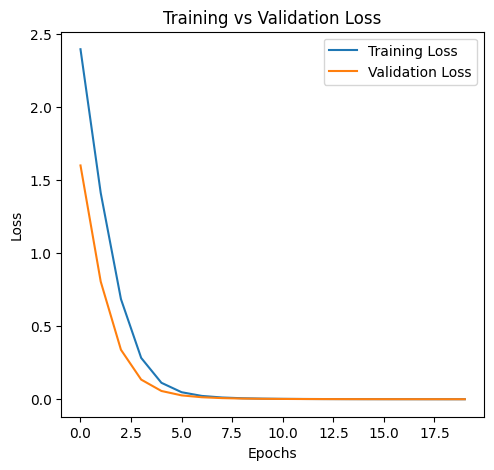

In [33]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()